# Unidad 7, Parte II - Computación III
Carrera Física Aplicada, INSPT UTN<br>
Daiana Dominikow. Junio 2024.

## Clase 2: Métodos de Monte Carlo
Su nombre viene dado por el casino del mismo nombre en Mónaco conocida como 'la capital del azar' (nuevamente, gracias wikipedia).<br>
Es un método no determinista o estadístico numérico, usado para aproximar expresiones matemáticas no muy amigables para resolver. Si bien data de los años 40, los métodos evolucionaron a partir de los avances en la computación.<br>
Para que se den una idea, esta herramienta se origina durante el desarrollo de la bomba atómica durante la segunda guerra mundial donde John Von Neumann y Stanislaw Ulam simulaban con números aleatorios problemas probabilísticos de la difusión de neutrones en material de fisión. <br>
<br>
#### Pero de qué se trata exactamente?
Habla de una serie de métodos que aproximan soluciones a problemas matemáticos del tipo estocástico  o determinista, esto es, el primero se puede analizar en terminos de probabilidad, ya que existe una secuencia de cambiante de eventos o parámetros que dan lugar al resultado, y el segundo refiere a eventos no ligados al azar, es decir, conocemos data concreta con la cual modelar nuestro fenómeno.<br>
Una simulación Montecarlo crea un modelo de resultados posibles aprovechando una distribución de probabilidad. Calcula lo que pasaría para cada situación random y luego de una serie larga de iteraciones del experimento, analiza el resultado final en términos de probabilidad, dando así una idea general del fenómeno. A mayor cantidad de iteraciones, mejores resultados se obtienen.<br> 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
#inicializamos nuestra semilla
minutos = dt.now().minute
segundos = dt.now().second
np.random.seed(minutos+segundos)

### Ejemplo 1: Evolución de un sistema
Un uso que podemos dar a los números pseudoaleatorios puede ser predecir la evolución de un sistema en el tiempo.<br>
Por ejemplo, veamos un sistema de $N$ partículas en una caja.<br>
Tenemos una caja dividida en el medio por una pared. En el inicio $t_0 = 0$, todas nuestras partículas se encuentran del lado izquierdo de la caja $n_i = N$.<br>
A continuación, se abre un pequeño agujero en la pared y una partícula puede pasar  o no a través del agujero por unidad de tiempo. $n_d = N - n_i$<br>
Luego de varias iteraciones, el sistema vá a tender a  tener igual cantidad de partículas de cada lado $N/2$.<br>
En vez de determinar condiciones iniciales complicadas para un sistema de $N$ partículas, modelamos el sistema estadísticamente.<br>
Para simularlo, asumimos que todas las partículas del lado izquierdo tienen iguales probabilidades de cruzar al lado derecho.<br>
La probabilidad de que la partícula se mueva del lado izquierdo al derecho en un $\Delta t$ es $\frac{n_i}{N}$<br>
Entonces:<br>
- Elegimos una cantidad N de partículas
- Creamos un loop en el tiempo, donde el tiempo tiene que ser bastante mayor al número de partículas y arrancamos a iterar
- Para cada iteración hay una probabilidad $\frac{n_i}{N}$ de moverse a la derecha. Comparar esta probabilidad con un número random $x$
- si $x <= \frac{n_i}{N}$, movemos una partícula de la izquieda a la derecha de la pared $n_i = n_i - 1$
- sino, movemos una particula del lado derecho al izquierdo $n_i = n_i + 1$

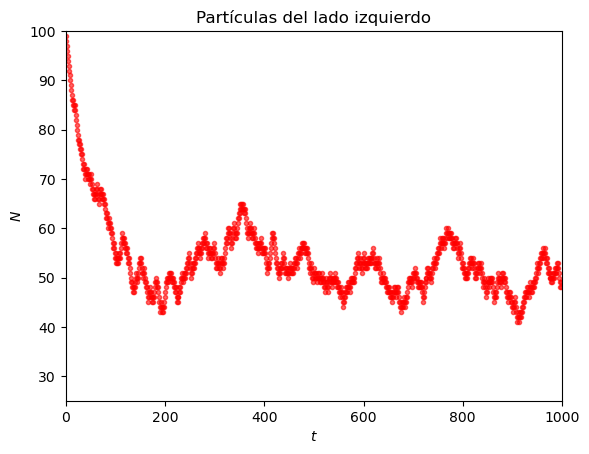

In [2]:
N = 100 #particulas
tiempo = 10*N
n_izq = N

for t in range (0, tiempo):
    
   if np.random.random() <= n_izq/N: 
      n_izq -= 1
   else: 
      n_izq += 1

   plt.plot(t, n_izq, '.r',alpha = 0.6)
   plt.axis([0,tiempo, N/4, N])


plt.xlabel('$t$')
plt.ylabel('$N$')
plt.title('Partículas del lado izquierdo')
plt.show()

## Consignas TP 5: números peudoaleatorios, Monte Carlo.
2. Determine la integral $\int_0^4 x^{2} dx$.<br><br>
3. Calcule el valor de $\pi$<br><br>
4. Calcule la integral de la distribucion de la campana de Gauss. Al ser una función simétrica, se puede calcular la integral entre 0 e infinito.<br>
Tener en cuenta que el infinito no existe en computación. Limite bien el rectángulo dentro del cuál generará los números aleatorios.<br>
$\int_{-\infty}^{\infty}e^{-x^{2}}dx = \sqrt{\pi}$<br><br>
5. En física, los caminos aleatorios, o 'random walks', son utilizados como modelos simplificados del movimiento browniano y difusión tales como el movimiento aleatorio de las moléculas en líquidos y gases. Además, los caminos aleatorios y algunos de los caminos que interactúan consigo mismos juegan un papel en la teoría cuántica de campos.<br><br> 
Para introducir el tema, podríamos simular la siguiente situación:  <br>
Supongamos que salimos a caminar, y que aleatoreamente en cada esquina decidimos en qué dirección queremos avanzar. Al cabo de varias 'esquinas', vemos a cuantas cuadras estamos de casa, si estamos a mas de 4 cuadras nos vamos a tomar el bondi para volver, estamos cansados, sino volvemos a pie.<br>
La pregunta entonces es. Cual es la caminata aleatoria máxima (cuantas cuadras máx) que podemos tomar entre 10 y 30 tal que en promedio siempre termine a menos de 4 cuadras?.<br><br>
Analizar gráficamente, punto extra si se animan a guardar los resultados en un dataframe y determinar con lo visto en la unidad 5 cual es la mayor cantidad de cuadras que podemos hacer que en promedio nos devuelva que volvemos caminando ;)

#### Métodos de Monte Carlo, ahora en 3D

Para llegar hasta acá, primero  me gustaría podamos ver  <a href="https://github.com/dai-dominikow/INSPT-Ayudantia-2024/blob/main/U8%20-%20MatplotLib%20-%20Plotear%20en%203D.ipynb">como plotear en 3D</a>. <br>
Esto no solo nos vá a dar una herramienta para presentar bellos informes, sino que nos vá a permitir visualizar en el espacio nuestra simulación<br>
La diferencia con el método anterior es que vamos a tener 3 números pseudoaleatoreos que darán una sucesión  de puntos en el espacio. Lo interesante es que ahora realmente tenemos la posibilidad de modelar situaciones que a mano pueden resultar complejas.<br><br>

6. Calcule el volumen de 1/8 de esfera. de radio $r = 4m$ y $ z = \int_0^R \int_0^R \sqrt{R^{2}-x^{2}+y^{2}}dxdy $<br><br>
Para validar esta integral, tenga en cuenta que el volumen de 1/8 de esfera es <br><br>
$volumen =\frac{4}{3}\frac{\pi R^{3}}{8}$<br><br>
7. Momento de incercia de un cilindro  respecto a su eje<br>
Dado un sistema de partículas y un eje arbitrario, el momento de inercia del mismo se define como la suma de los productos de las masas de las partículas por el cuadrado de la distancia mínima r de cada partícula a dicho eje. <br><br>
$I = \sum m_ir_i^{2}$<br><br>
Para obtener el momento de incercia de un cilindro, como ser el del primer TP de Labo 1,  podemos hacer la triple integral en coordenadas  que aquí omitiremos y nos vá a devolver la fórmula<br> <br>
$I = \frac{1}{2} M R^{2}$<br><br>
Supongamos entonces que tenemos un cilindro de radio $r = 1 cm$, altura $h = 1 cm$, y masa $m = 20g$<br>
Se anima a encontrar su momento de incercia mediante el método de MonteCarlo?<br> 
Itere unas 50, 100 y 200 veces, compare contra los resultados teóricos.<br><br>



### Hagamos juntos los siguientes ejercicios del TP
3. Calcule el valor de $\pi$<br><br>

Para estimar este valor, recordemos el ejercicio $0$, donde les pedí hagan un gráfico de distribución. Ven que les devolvió un ploteo cuadrado también? bueno, vamos a utilizar esto para crear un círculo dentro de este cuadrado, y ver  a partir de la relación entre estas superficies y los puntos generados pseudoaleatoreamente como obtener el valor de $\pi$.



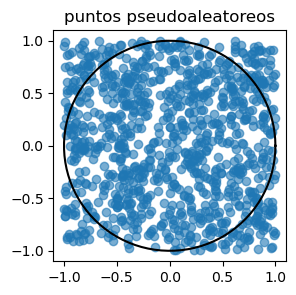

In [3]:
# todo este choclo es para graficar la idea de lo que digo, puntos que caen por dentro y fuera de la circunferencia
n = 1000
inicio = -1
fin = 1
r=1

random_list = np.random.random(n) * (fin - inicio) + inicio
random_list2 = np.random.random(n) * (fin - inicio) + inicio

theta = np.linspace( 0 , 2 * np.pi , 100 )
x = r * np.cos( theta )
y = r * np.sin( theta )
plt.figure(figsize=(3,3))
plt.plot( x, y , color = 'black')
plt.scatter(random_list,random_list2, alpha = 0.6)
plt.title('puntos pseudoaleatoreos')
plt.show()

Entonces, mirando la grafica sabemos que el área del cuadrado es  $l^{2}$, donde $l = 2r$.<br> 
Por otro lado, el área de la circunferencia es $\pi r^{2}$<br>
Dividiendo miembro a miembro, nos queda algo así como<br><br>
$\frac{Area_{cuadr}}{Area_{cir}} = \frac{(2r)^{2}}{\pi r^{2}}$<br><br>
Y despejando y cancelando algunas cosas entonces para obtener $\pi$<br><br>
$\pi = 4\frac{Area_{circ}r^{2}}{Area_{cuadr}r^{2}} = 4\frac{Area_{circ}}{Area_{cuadr}}$<br><br>
Que para nuestra simulacion,  usaremos pequeños dA (puntos) aleatoreos que caigan dentro del area del cuadrado y dentro de la circunferencia, entonces<br><br>
$\pi = 4\frac{Puntos_{circ}}{Puntos_{cuadr}}$<br><br>
Por simplicidad, usaremos un circulo de radio 1.

valor estimado de pi para 1000 iteraciones: 3.072


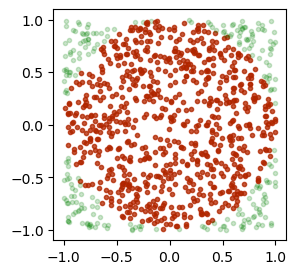

In [4]:

n = 1000 #cantidad de puntos
r = 1 #radio de la circunferencia
fin = r #limite max valor numero pseudoaleatorio
inicio = -r #limite min valor numero pseudoaleatorio
cuadrado = 0 #contador
circulo = 0 #contador
 
plt.figure(figsize=(3,3))

for i in range(n):
    # como estoy trabajando con dos dimensiones, voy a generar valores random para 'x' e 'y' entre r y -r
    rand_x = np.random.rand() * (fin - inicio) + (inicio) 
    rand_y = np.random.rand() * (fin - inicio) + (inicio)  
 
    # para ver que caiga dentro del circulo de radio r
    distancia_centro = np.sqrt(rand_x**2 + rand_y**2)

    if distancia_centro <= r:
        circulo += 1
        plt.plot(rand_x,rand_y,'.r',alpha = 0.7)
    cuadrado += 1
    plt.plot(rand_x,rand_y,'.g',alpha = 0.2)

pi = 4 * circulo / cuadrado
print(f'valor estimado de pi para {n} iteraciones: {pi}')
plt.show()

6. Calcule el volumen de 1/8 de esfera. de radio $r = 4m$ y $ z = \int_0^R \int_0^R \sqrt{R^{2}-x^{2}+y^{2}}dxdy $<br><br>
Para validar esta integral, tenga en cuenta que el volumen de 1/8 de esfera es <br><br>
$volumen =\frac{4}{3}\frac{\pi R^{3}}{8}$<br><br>

In [5]:
### Hagamos juntos el ejercicio 6
### Tengamos en cuenta que no es necesario para obtener los resultados plotear cada punto, esto se hace para visualizar el método.
### Primero vamos a sacarlo numéricamente, luego vamos a plotearlo.

contador = 0
n = 4000
r = 4

for i in range (n):
    #como los nros son positivos, va a estar en el primer octante
    x = np.random.rand() * r
    y = np.random.rand() * r
    z = np.random.rand() * r
    d = x**2 + y**2 +z**2 

    if d <= r**2 :
            contador = contador + 1
            
integral = contador / n
vol_recinto = r**3
vol_mc = integral * vol_recinto
vol_def = round(((4/3) * np.pi * r**3 )/ 8,2) 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )

Vol montecarlo: 33.824 m^3. Vol definicion: 33.51m^3


Vol montecarlo: 33.232 m^3. Vol definicion: 33.51m^3


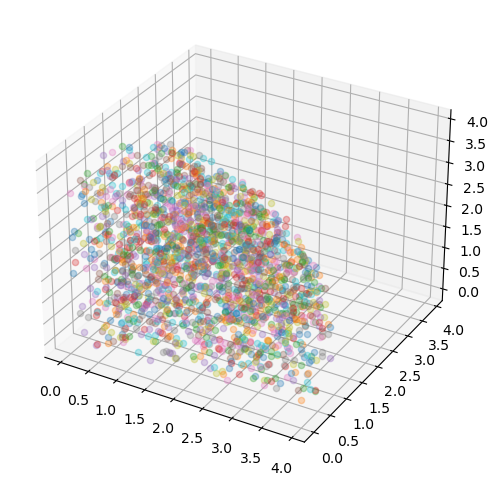

In [6]:
#Ahora vamos a dejarlo lindo :)

contador = 0
n = 4000
r = 4
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot( projection='3d')

for i in range (n):
    #como los nros son positivos, va a estar en el primer octante
    x = np.random.rand() * r
    y = np.random.rand() * r
    z = np.random.rand() * r
    d = x**2 + y**2 +z**2

    if d <= r**2 :
            contador = contador + 1
            ax.scatter(x,y,z, alpha=0.3) 
            
integral = contador / n
vol_recinto = r**3
vol_mc = integral * vol_recinto
vol_def = round(((4/3) * np.pi * r**3 )/ 8,2) 
print('Vol montecarlo: '+ str(vol_mc) + ' m^3. Vol definicion: ' + str(vol_def) + 'm^3' )
plt.show()
